<a href="https://colab.research.google.com/github/Antonypraveenraj001/tensorflow_AI/blob/main/InterpretableML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is about an explainable machine learning application

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[feature_names]

In [ ]:
print(feature_names)

['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red', 'Goals in PSO']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5,
                                    min_samples_split=5).fit(train_X, train_y)

In [ ]:
y_pred = tree_model.predict(val_X)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(val_y, y_pred)
print(cm)
accuracy_score(val_y, y_pred)

[[10  6]
 [ 4 12]]


0.6875

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)

In [ ]:
y_pred = my_model.predict(val_X)

In [ ]:
cm = confusion_matrix(val_y, y_pred)
print(cm)
accuracy_score(val_y, y_pred)

[[10  6]
 [ 4 12]]


0.6875

In [ ]:
!pip install eli5

     |████████████████████████████████| 112kB 8.5MB/s 


In [ ]:
import eli5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from eli5.sklearn import PermutationImportance

In [ ]:
perm = PermutationImportance(tree_model, random_state=1).fit(val_X, val_y)

In [ ]:
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1437 ± 0.1159,Goal Scored
0.0312 ± 0.0395,On-Target
0.0187 ± 0.0306,Distance Covered (Kms)
0.0063 ± 0.0729,Off-Target
0 ± 0.0000,Red
0 ± 0.0000,Ball Possession %
0 ± 0.0000,Blocked
0 ± 0.0000,Offsides
0 ± 0.0000,Goals in PSO
0 ± 0.0000,Saves


In [ ]:
perm = PermutationImportance(tree_model, random_state=1).fit(val_X, val_y)

In [ ]:
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1437 ± 0.1159,Goal Scored
0.0312 ± 0.0395,On-Target
0.0187 ± 0.0306,Distance Covered (Kms)
0.0063 ± 0.0729,Off-Target
0 ± 0.0000,Red
0 ± 0.0000,Ball Possession %
0 ± 0.0000,Blocked
0 ± 0.0000,Offsides
0 ± 0.0000,Goals in PSO
0 ± 0.0000,Saves


In [ ]:
!pip install pdpbox

     |████████████████████████████████| 34.0MB 117kB/s 
     |████████████████████████████████| 13.1MB 39.3MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35758228 sha256=c7bc622ecd4a5d2e9d7538279a3aa26219a885bb0419e56b93fba2c5312442d4
  Stored in directory: /root/.cache/pip/wheels/c8/13/11/ecac74c6192790c94f6f5d919f1a388f927b9febb690e45eef
Successfully built pdpbox
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

In [ ]:
feature_to_plot = 'Goal Scored'

In [ ]:
pdp_dist = pdp.pdp_isolate(model=tree_model, dataset=val_X,
                           model_features=feature_names,
                           feature=feature_to_plot)

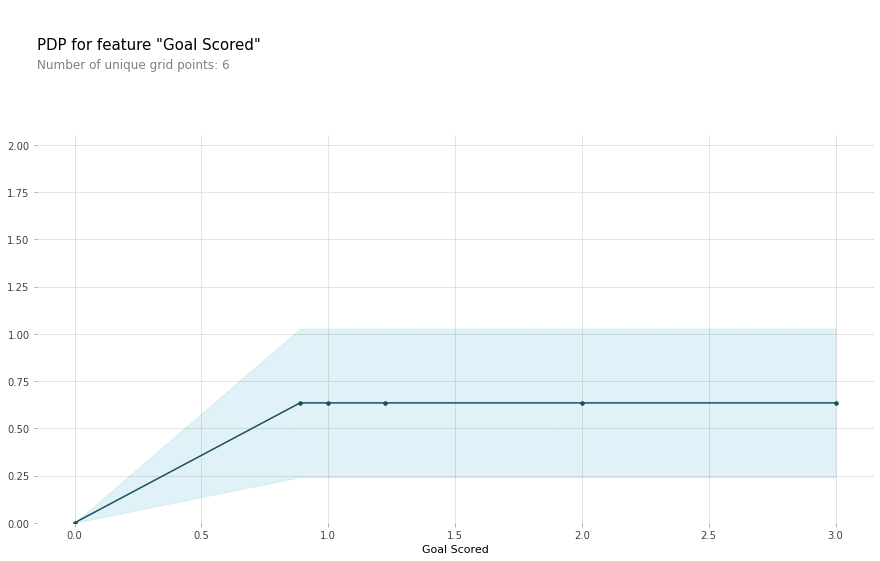

In [ ]:
pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

END of the show....